This is a notebook where I am going to try and predict if a marvel character is good/bad based on physical attributes such as eyes, hair color, etc

In [33]:
# modules
import pandas as pd
import matplotlib.pyplot as plt

# data
marvel = pd.read_csv("./marvel-wikia-data.csv")

In [12]:
# explore data
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16375,673702,Yologarch (Earth-616),\/Yologarch_(Earth-616),NaN,Bad Characters,NaN,NaN,NaN,NaN,Living Characters,NaN,NaN,NaN


In [7]:
# further explorations
marvel.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


In [8]:
marvel["ALIGN"].value_counts()

Bad Characters        6720
Good Characters       4636
Neutral Characters    2208
Name: ALIGN, dtype: int64

array([[<AxesSubplot:title={'center':'page_id'}>,
        <AxesSubplot:title={'center':'APPEARANCES'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

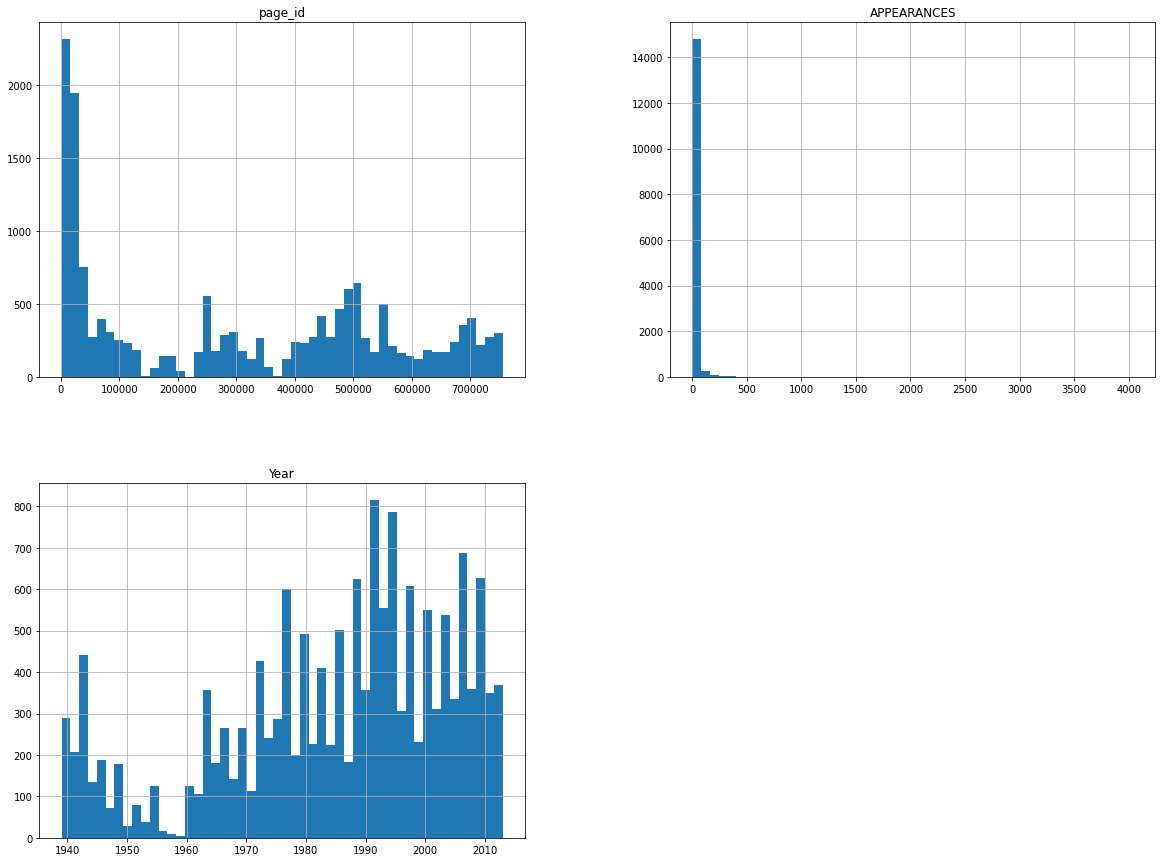

In [10]:
# some begining graphs
%matplotlib inline
marvel.hist(bins=50, figsize =(20,15))

No surprise that the appearances are more frequent towards the lower-end of the histogram. I am curious to know what caused a dip in Year on 1960. 

In [34]:
# Need to remove certain meta columns
marvel = marvel.drop(columns = ["urlslug", "GSM"])

In [35]:
# any NULL values
any_missing = marvel.isnull().values.any()

# any null values in output
null_align = marvel.ALIGN.isnull().sum()

print(any_missing, null_align)

True 2812


In [40]:
# which columns with NAs

nan_values = marvel.isna()
nan_columns = nan_values.any()

columns_with_nan = marvel.columns[nan_columns].tolist()
print(columns_with_nan)

['ID', 'EYE', 'HAIR', 'SEX', 'APPEARANCES', 'FIRST APPEARANCE', 'Year']


In [41]:
# remove those with NA on align
marvel = marvel.dropna(subset=['ALIGN'])


<AxesSubplot:>

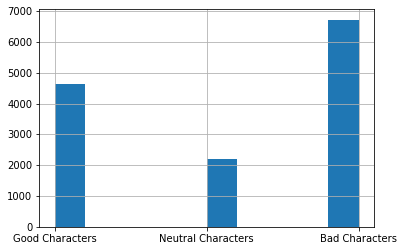

In [44]:
# marvel histogram
marvel['ALIGN'].hist()

In [48]:
# create test/test datasets
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
for train_index, test_index, in split.split(marvel, marvel["ALIGN"]):
    strat_train_set = marvel.iloc[train_index]
    strat_test_set = marvel.iloc[test_index]

In [51]:
# see proportions for align
strat_test_set["ALIGN"].value_counts()/len(strat_test_set)

Bad Characters        0.495393
Good Characters       0.341688
Neutral Characters    0.162919
Name: ALIGN, dtype: float64

In [55]:
# input NAs

KeyError: 'ALIGN'